# Data Exploration

## Loading required libraries

In [ ]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import seaborn as sns
import matplotlib.pyplot as plt

## 1. Loading the data for participant 5C

In [ ]:
df = None
chunksize = 10 ** 5

with pd.read_csv("5C.csv", chunksize=chunksize, index_col = None, engine = 'python') as reader:
    for chunk in reader:
        df = pd.concat([df, chunk])

In [ ]:
df = df.drop(columns = 'id')

## 2. Descriptive analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732609 entries, 0 to 1732608
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   X         float64
 1   Y         float64
 2   Z         float64
 3   BVP       float64
 4   IBI       float64
 5   EDA       float64
 6   HR        float64
 7   TEMP      float64
 8   datetime  object 
 9   label     float64
dtypes: float64(9), object(1)
memory usage: 132.2+ MB


In [ ]:
print(df.isna().sum())
df = df.dropna()

X           0
Y           0
Z           0
BVP         0
IBI         0
EDA         0
HR          0
TEMP        0
datetime    0
label       0
dtype: int64


In [ ]:
df.drop(columns = 'label').describe()

,X,Y,Z,BVP,IBI,EDA,HR,TEMP
count,1732609.000,1732609.000,1732609.000,1732609.000,1732609.000,1732609.000,1732609.000,1732609.000
mean,-47.226,11.399,12.112,0.012,0.710,1.085,94.781,28.325
std,23.469,23.738,33.342,133.963,0.204,2.741,15.003,1.780
min,-128.000,-128.000,-128.000,-2429.550,0.344,0.000,56.050,26.710
25%,-62.000,4.000,-9.000,-22.530,0.547,0.137,80.480,27.110
50%,-62.000,21.000,-9.000,0.500,0.719,0.350,106.230,27.330
75%,-33.000,21.000,33.000,23.740,0.844,1.348,106.230,28.990
max,127.000,127.000,127.000,2547.600,1.328,22.777,138.370,36.590


<Axes: >

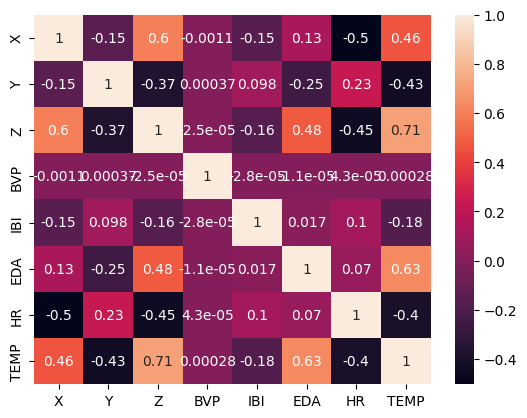

In [ ]:
sns.heatmap(df.drop(columns = ['label', 'datetime']).corr(), annot = True)

<Axes: xlabel='label', ylabel='count'>

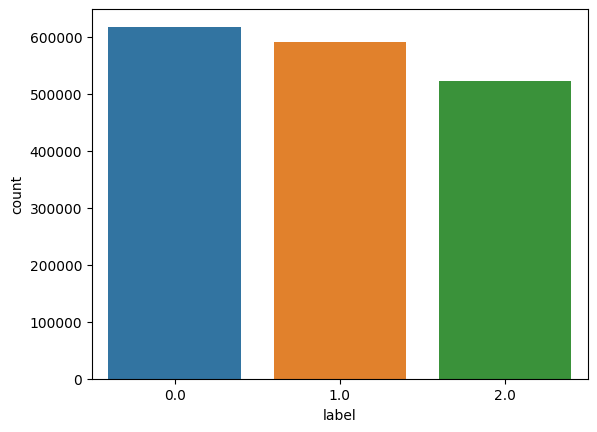

In [ ]:
sns.countplot(data = df, x = 'label')

## 3. Visual Analytics

Scaling values of data for better readability

In [ ]:
scaled_df = df.copy()

scaled_df['datetime'] = pd.to_datetime(scaled_df['datetime'])
scaled_df['time'] = [x.time() for x in scaled_df['datetime']]
scaled_df['date'] = [x.date() for x in scaled_df['datetime']]
scaled_df = scaled_df.drop(columns = 'datetime')

col_names = scaled_df.columns[:-3]

scaled_df[col_names] = MinMaxScaler().fit_transform(scaled_df[col_names])

scaled_df.head()

,X,Y,Z,BVP,IBI,EDA,HR,TEMP,label,time,date
0,0.416,0.333,1.000,0.483,0.429,0.963,0.323,0.990,1.000,22:31:00,2020-04-14
1,0.416,0.333,1.000,0.494,0.429,0.963,0.323,0.990,1.000,22:31:00.031249,2020-04-14
2,0.416,0.333,1.000,0.502,0.429,0.963,0.323,0.990,1.000,22:31:00.062500,2020-04-14
3,0.416,0.333,1.000,0.506,0.429,0.963,0.323,0.990,1.000,22:31:00.093750,2020-04-14
4,0.416,0.333,1.000,0.506,0.429,0.963,0.323,0.990,1.000,22:31:00.124999,2020-04-14


Dates used for data visualization:
[datetime.date(2020, 6, 23) datetime.date(2020, 6, 24)
 datetime.date(2020, 6, 25)]


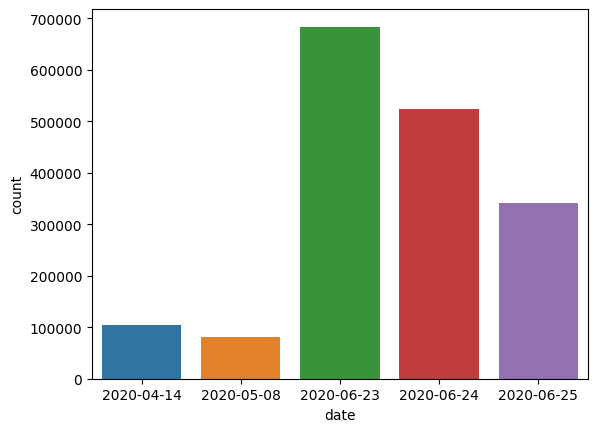

In [ ]:
sns.countplot(data = scaled_df, x = 'date')

dates = scaled_df['date'].unique()[2:]
print("Dates used for data visualization:")
print(dates)

Extracting rows containing the required dates for plotting data

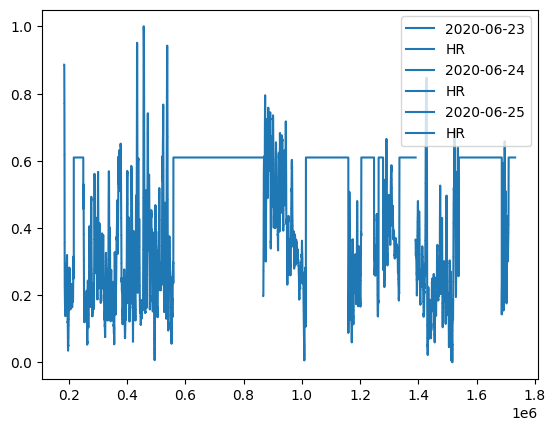

In [ ]:
temp = dict()
for date in dates:
    temp[str(date)] = scaled_df.loc[scaled_df['date'] == date, ['HR', 'time']]

for key in temp:
    sns.lineplot(data = temp[key], label = f'{key}')